In [11]:
import pandas as pd

In [163]:
df = pd.read_html('https://fbref.com/en/players/e280527c/scout/10737/Marcel-Sabitzer-Scouting-Report')
df = df[0]
df = df[:].values
df = pd.DataFrame(df[:,1:3], index=df[:,0])
df = df.drop(['Shooting', 'Statistic'], axis = 0)

df = df.T
df = df.dropna(axis=1)
df = df.loc[:,~df.columns.duplicated()]
df

,Goals,Assists,Non-Penalty Goals,Penalty Kicks Made,Penalty Kicks Attempted,Yellow Cards,Red Cards,xG,npxG,xA,...,Fouls Committed,Fouls Drawn,Offsides,Penalty Kicks Won,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials won,Aerials lost,% of Aerials Won
0,0.36,0.13,0.18,0.18,0.18,0.36,0.00,0.32,0.19,0.10,...,1.16,1.91,0.31,0.00,0.00,0.00,12.08,0.93,0.93,50.0%
1,99,73,86,99,99,13,56,99,91,68,...,79,74,2,39,60,52,85,27,85,54


In [20]:
import matplotlib.pyplot as plt

from mplsoccer import PyPizza, FontManager

font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [164]:
AttackingPassingParams= ['Non-Penalty Goals','npxG','Shots Total','Shot-Creating Actions',
                'xA','Key Passes','Through Balls','Passes into Final Third','Passes into Penalty Area',
 'Crosses into Penalty Area','Progressive Passes','Passes Under Pressure']


TechnicalDefensiveParams= [ 'Ball Recoveries', 'Tackles Won','Interceptions','Blocks','% of dribblers tackled','Pressures'
                  ,'Successful Pressure %','Dribbles Completed', 'Successful Dribble %', 'Progressive Carries', 
                           'Progressive Passes Rec','% of Aerials Won', 'Aerials won']

APP= ['Non-Penalty\nGoals','npxG','Shots Total','Shot-Creating\nActions',
                'xA','Key Passes','Through Balls','Passes\nFinal Third','Passes\nPenalty Area',
 'Crosses\nPenalty Area','Progressive\nPasses','Passes Under\nPressure']


TDP= [ 'Ball\nRecoveries', 'Tackles Won','Interceptions','Blocks','% of\ndribblers tackled','Pressures'
                  ,'% of\nSuccessful Pressures','Dribbles\nCompleted', '% of\nSuccessful Dribbles', 'Progressive\nCarries', 
                           'Progressive\nPasses Rec','% of\nAerials Won', 'Aerials won']

#getting rows values
AttackingPassingPercintile=[]   
for x in AttackingPassingParams:
    AttackingPassingPercintile.append(int(df[x][1]))


TechnicalDefensivePercintile=[]   
for x in TechnicalDefensiveParams:
    TechnicalDefensivePercintile.append(int(df[x][1]))

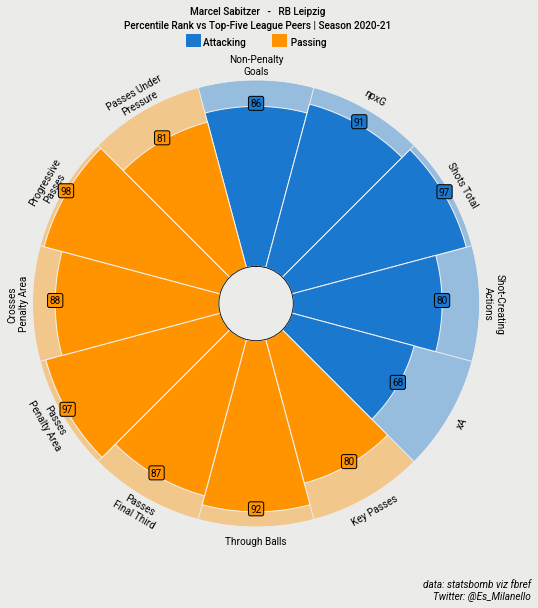

In [165]:
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 7
text_colors = ["#000000"] * 12 #+ ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=APP,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    AttackingPassingPercintile,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Marcel Sabitzer   -   RB Leipzig", size=25,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs Top-Five League Peers | Season 2020-21",
    size=16,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "Twitter: @Es_Milanello"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.42, 0.925, "Attacking                  Passing", size=14,
    fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.39, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.54, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.14
#)   # these values might differ when you are plotting

plt.savefig('Sabitzer1.png', dpi=300, bbox_inches='tight')


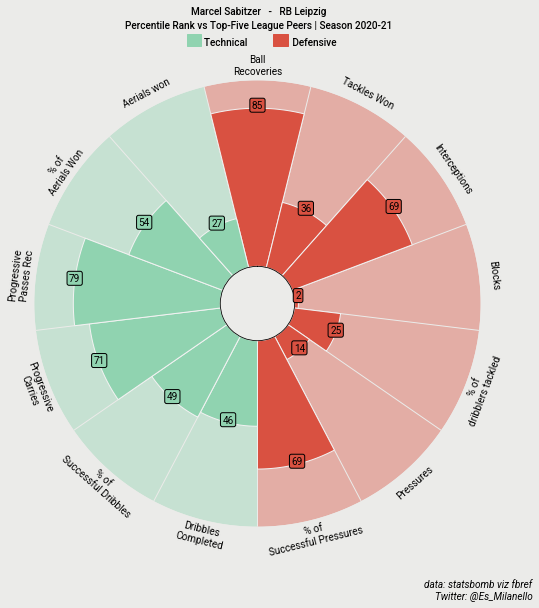

In [166]:
slice_colors = ["#D95141"] * 7 + ["#90D3B0"] * 6
text_colors = ["#000000"] * 13 #+ ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=TDP,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    TechnicalDefensivePercintile,      # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Marcel Sabitzer   -   RB Leipzig", size=16,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs Top-Five League Peers | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "Twitter: @Es_Milanello"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.42, 0.925, "Technical                  Defensive", size=14,
    fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.39, 0.9225), 0.025, 0.021, fill=True, color="#90D3B0",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.54, 0.9225), 0.025, 0.021, fill=True, color="#D95141",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
#ax_image = add_image(
#    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.14
#)   # these values might differ when you are plotting

plt.savefig('sab2.png', dpi=300, bbox_inches='tight')
